In [795]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt


class Neural_Network(object):
    def __init__(self):
        #Define Parameters
        self.inputLayerSize = 2
        self.outputLayerSize =1
        self.hiddenLayerSize =3
        
        #Define Weights
        self.W1=np.random.rand(self.inputLayerSize,self.hiddenLayerSize)
        self.W2=np.random.rand(self.hiddenLayerSize,self.outputLayerSize)

    def forward(self,X):
        #Propagate inputs through network
        self.z2 = np.dot(X,self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2,self.W2)
        yHat = self.sigmoid(self.z3)
        return yHat
    
    def sigmoid(self, z):
        #Apply Sigmoid Activation Function
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self,z):
        #Derivative of Sigmoid Function
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def relu(self, z):
        return np.maximum(0, z)
    
    def reluPrime(self,z):
        return 1 * (z > 0)
    
    def costFunction(self, X, y):
        #Compute Cost Function with weights already stored in class
        self.yHat=self.forward(X)
        J=0.5*sum((y-self.yHat)**2)
        return J
    
    def costFunctionPrime(self, X, y):
        #Compute derivatives with respect to W1 and W2
        self.yHat=self.forward(X)
        delta3 = np.multiply(-(y-self.yHat),self.sigmoidPrime(self.z3))
        dJdW2=np.dot(self.a2.T,delta3)
        delta2=np.dot(delta3,self.W2.T)*self.sigmoidPrime(self.z2)
        dJdW1=np.dot(X.T,delta2)
        return dJdW1,dJdW2
    

In [796]:
X=np.array(([3,5],[5,1],[10,1]),dtype=float)
y=np.array(([75],[80],[93]),dtype=float)

In [797]:
X


array([[ 3.,  5.],
       [ 5.,  1.],
       [10.,  1.]])

In [798]:
y

array([[75.],
       [80.],
       [93.]])

In [799]:
X=X/np.amax(X,axis=0)
y=y/100

In [800]:
X,y


(array([[0.3, 1. ],
        [0.5, 0.2],
        [1. , 0.2]]),
 array([[0.75],
        [0.8 ],
        [0.93]]))

In [801]:
NN=Neural_Network()

In [802]:
yH=NN.forward(X)

In [803]:
yH

array([[0.71204099],
       [0.67276178],
       [0.67752558]])

In [804]:
y

array([[0.75],
       [0.8 ],
       [0.93]])

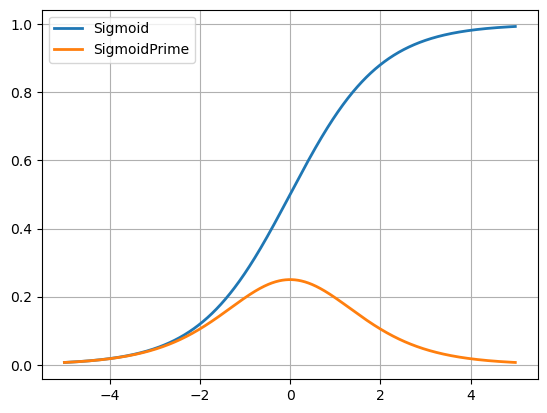

In [805]:
testValues=np.arange(-5,5,0.01)
plt.plot(testValues,NN.sigmoid(testValues),linewidth=2)
plt.plot(testValues, NN.sigmoidPrime(testValues),linewidth=2)
plt.grid(1)
plt.legend(['Sigmoid','SigmoidPrime'])


In [806]:
NN=Neural_Network()

In [807]:
cost1=NN.costFunction(X,y)

In [808]:
cost1

array([0.02076549])

In [809]:
dJdW1,dJdW2=NN.costFunctionPrime(X,y)

In [810]:
dJdW1

array([[-0.00916012, -0.00420935, -0.00370108],
       [-0.00179379, -0.00079051, -0.00073044]])

In [811]:
dJdW2

array([[-0.02915397],
       [-0.02817187],
       [-0.03270903]])

In [812]:
scalar=1
NN.W1 = NN.W1+scalar*dJdW1
NN.W2 = NN.W2+scalar*dJdW2
cost2 = NN.costFunction(X,y)
print (cost1,cost2)

[0.02076549] [0.02382471]


In [813]:
scalar=0.1
NN.W1 = NN.W1-scalar*dJdW1
NN.W2 = NN.W2-scalar*dJdW2
cost3 = NN.costFunction(X,y)
print (cost2,cost3)

[0.02382471] [0.02349808]


In [814]:
###Q1

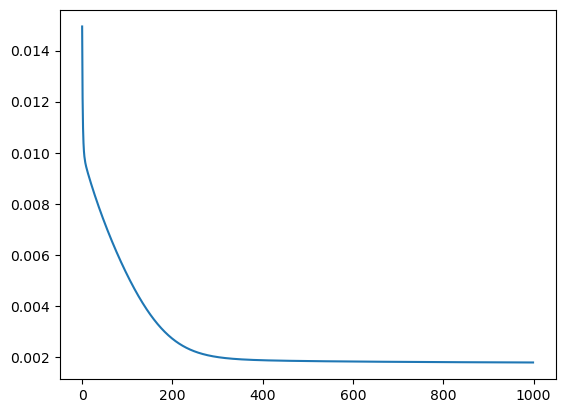

In [815]:
cost_history = []

iterations = 1000
for i in range(iterations):
    scalar = 3
    dJdW1, dJdW2 = NN.costFunctionPrime(X, y)
    NN.W1 = NN.W1 - scalar * dJdW1
    NN.W2 = NN.W2 - scalar * dJdW2
    cost = NN.costFunction(X, y)
    cost_history.append(cost)
    
plt.plot(cost_history)

In [816]:
###q3

theta1 = [NN.W1, NN.W2]
theta1

tha

[array([[ 1.52272512,  1.61457555,  1.13720572],
        [-0.45703166, -1.15224553,  0.3920083 ]]),
 array([[1.079106  ],
        [1.3942638 ],
        [0.10405825]])]